Analysis

-There are less number of drivers in rural areas with higher.
-Large numbers of drivers are in the urban areas with competitive/ lower fares among large number of rides.
 Urban rides represent over half of the data represented
-Suburban rides tend to be less saturated, and may have further opportunities to expand

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df=pd.merge(ride_data,city_data,on="city", how="left")
# Display the data table for preview
city_ride_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
#obtain the x and y for each city type and grouping by city
urban_city = city_ride_df[city_ride_df["type"] == "Urban"].groupby([city_ride_df["city"]])
suburban_city = city_ride_df[city_ride_df["type"] == "Suburban"].groupby([city_ride_df["city"]])
rural_city = city_ride_df[city_ride_df["type"] == "Rural"].groupby([city_ride_df["city"]])

In [3]:
#calculation for urban
ride_urban=urban_city["ride_id"].count()
fare_urban=urban_city["fare"].mean()
driver_urban=urban_city["driver_count"].mean()

In [4]:
#calculation for suburban
ride_suburban=suburban_city["ride_id"].count()
fare_suburban=suburban_city["fare"].mean()
driver_suburban=suburban_city["driver_count"].mean()

In [5]:
#calculation for rural
ride_rural=rural_city["ride_id"].count()
fare_rural=rural_city["fare"].mean()
driver_rural=rural_city["driver_count"].mean()

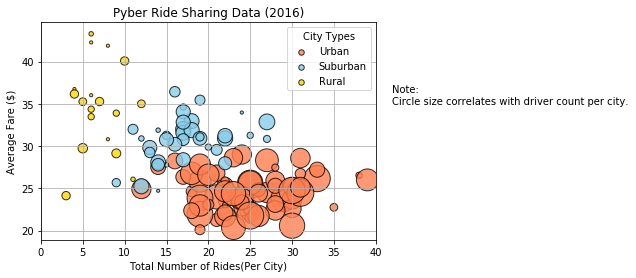

In [6]:
# Build scatter plot for the city type
plt.scatter(ride_urban,fare_urban, s=driver_urban*10,label="Urban",color=["coral"],edgecolor="black",alpha=0.80, marker="o")
plt.scatter(ride_suburban,fare_suburban, s=driver_suburban*10,label="Suburban",color=["skyblue"],edgecolor="black",alpha=0.80, marker="o")
plt.scatter(ride_rural,fare_rural, s=driver_rural*10,label="Rural",color=["gold"],edgecolor="black",alpha=0.80, marker="o")

plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlim((0,40))
plt.grid(True)

legend=plt.legend(title="City Types", loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("Fig1.png")
plt.show()

## Total Fares by City Type

In [7]:
# calculate type percent
city_type=city_ride_df.groupby(["type"])
sum_fare=city_type["fare"].sum()


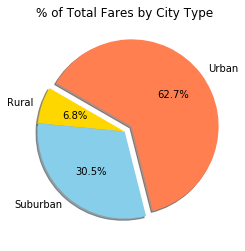

In [8]:
# build pie chart

plt.pie(sum_fare, 
        labels= ["Rural","Suburban","Urban"],
        colors=["gold","skyblue","coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.savefig("Fig2.png")
plt.show()

## Total Rides by City Type

In [9]:
# Calculate Ride Percents
city_type=city_ride_df.groupby(["type"])
ride_count=city_type["ride_id"].count()


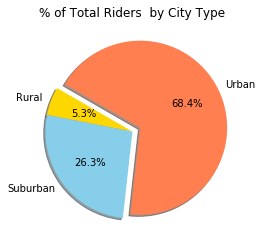

In [10]:
# Build Pie Chart
plt.pie(ride_count, 
        labels= ["Rural","Suburban","Urban"],
        colors=["gold","skyblue","coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Riders  by City Type")
plt.savefig("Fig3.png")
plt.show()

## Total Drivers by City Type

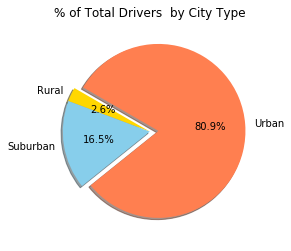

In [11]:
# Calculate Driver Percents
driver_city_type=city_data.groupby(["type"])
driver_tot=driver_city_type["driver_count"].sum()

# Build Pie Charts 
plt.pie(driver_tot, 
        labels= ["Rural","Suburban","Urban"],
        colors=["gold","skyblue","coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Drivers  by City Type")
plt.savefig("Fig4.png")
plt.show()